# Question 1

##### Grid search cross validation 

The cross-validation technique can be used to train the dataset on various machine learning algorithms and choose the best out of it. Grid Search CV tries all combinations of parameters grid for a model and returns with the best set of parameters having the best performance score. This can also serve as a disadvantage, as training the model of each combination of parameters increases the time complexity.

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

### Implementing on Random forest 

Importing data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
X = df.drop('target', axis = 1)

y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
rfc = RandomForestClassifier()

In [10]:
model = rfc.fit(X_train,y_train)

In [11]:
print (f'Accuracy - : {model.score(X_test,y_test):.3f}')

Accuracy - : 0.990


Initializing GridSearchCV() object and fitting it with hyperparameters

In [6]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [7]:
print(clf.best_params_)

{'max_depth': 14, 'max_features': 6}


In [8]:
print(clf.best_score_)

0.9831964006259781


### Implementing on Random forest 

In [14]:
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target

In [15]:
std_slc = StandardScaler()

In [16]:
pca = decomposition.PCA()

In [17]:
dec_tree = tree.DecisionTreeClassifier()

In [18]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [19]:
n_components = list(range(1,X.shape[1]+1,1))

In [20]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [21]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [23]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13]})

In [24]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 4
Best Number Of Components: 8

DecisionTreeClassifier(criterion='entropy', max_depth=4)


# Question 2

What is Stride, Padding & Pooling? Explain with an example.What is Stride, Padding & Pooling? Explain with an example.

## Padding

Padding describes the addition of empty pixels around the edges of an image. The purpose of padding is to preserve the original size of an image when applying a convolutional filter and enable the filter to perform full convolutions on the edge pixels.

When performing a standard convolution operation, the image shrinks by a factor equivalent to the filter size plus one. If we take an image of width and height 6, and a filter of width and height 3, the image shrinks by the following factor.

#### 6−3+1=4

The reason for the shrinking image is that a 3×3 filter cannot slide all three of its columns over the first two horizontal pixels in the image. The same problem exists with regard to the rows and the vertical pixels.

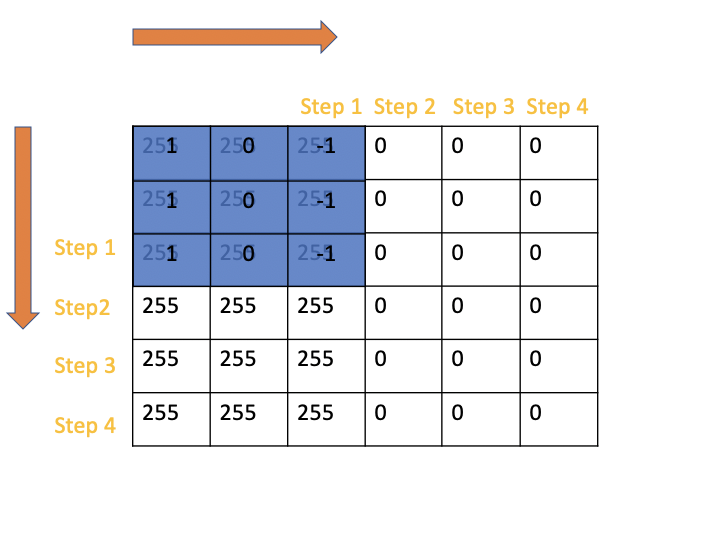

This immediately entails two problems:

1) If you perform multiple convolution operations consecutively, the final image might become vanishingly small because the image will shrink with every operation.

2) Because you cannot slide the full filter over the edge pixels, you cannot perform full convolutions. As a result you will lose some information at the edges.

To mitigate the problems mentioned above, we can pad our images with additional empty pixels around the edges.

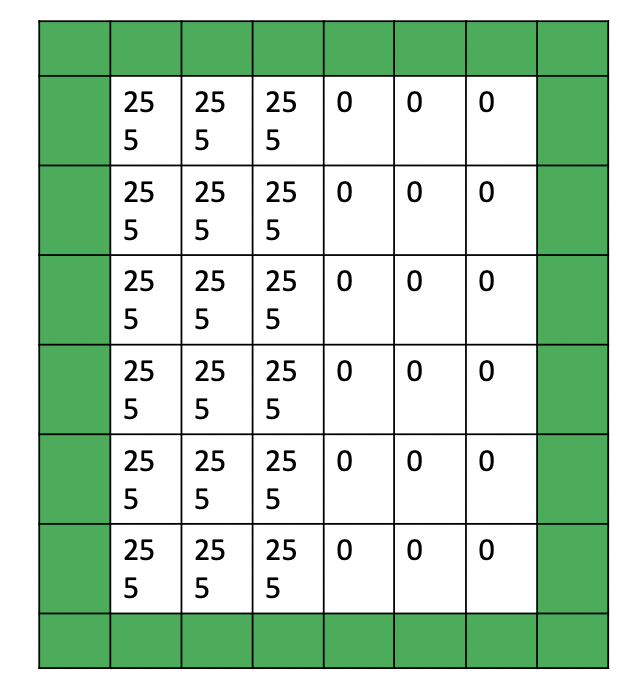

If we apply a 3×3 filter, we can slide it by 6 steps in every direction. The resulting feature map of the convolutional operation preserves the 6×6 dimensions of the original image.

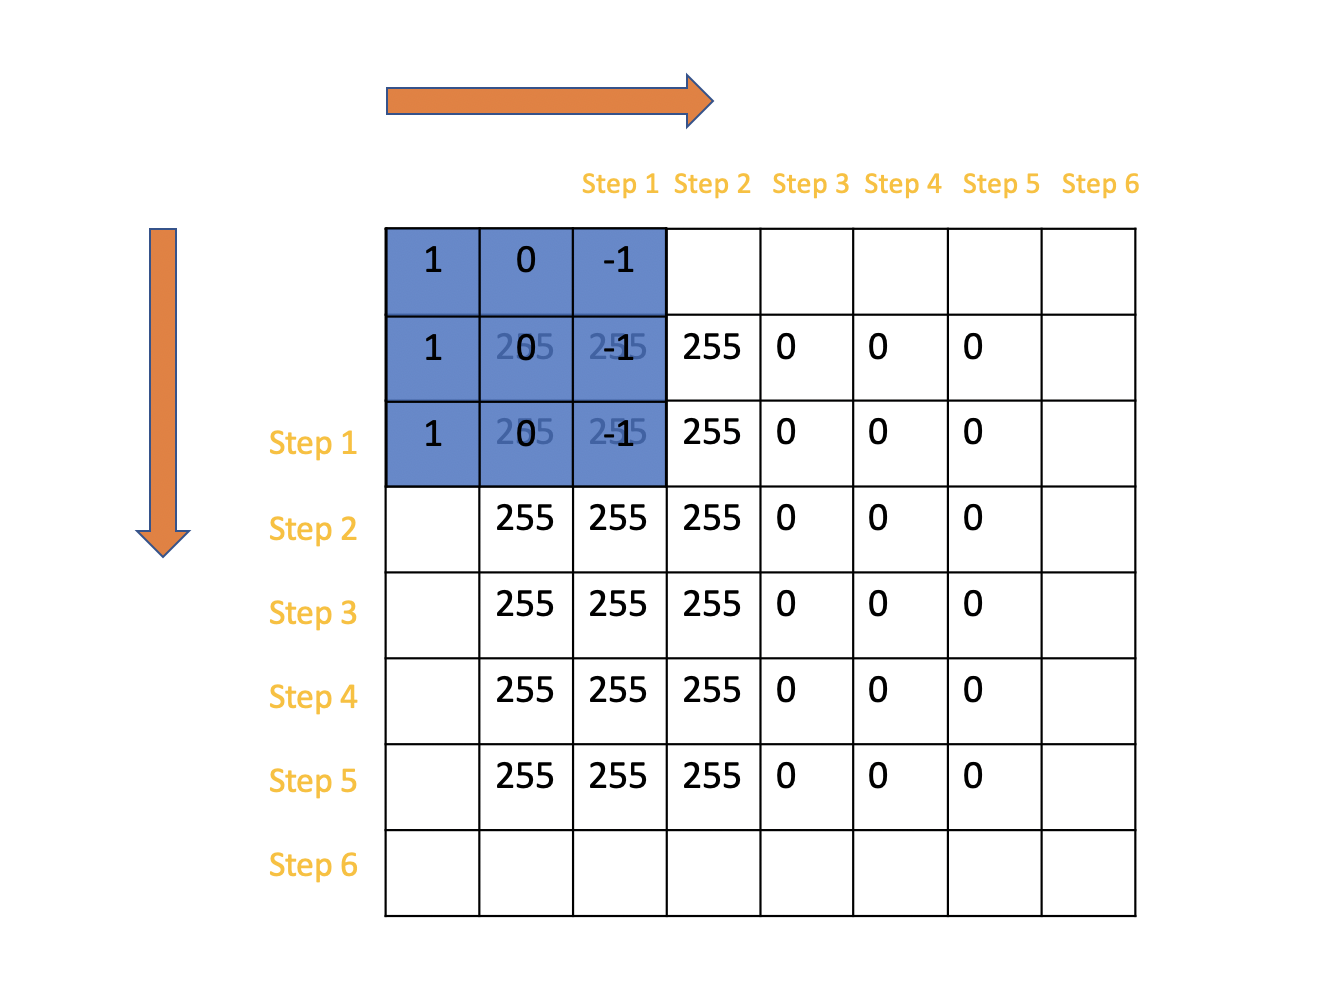

## Stride

The stride simply describes the step size when sliding the convolutional filter over the input image. We’ve used a stride of 1.
With a stride of 2, we would slide the window by two pixels on each step.

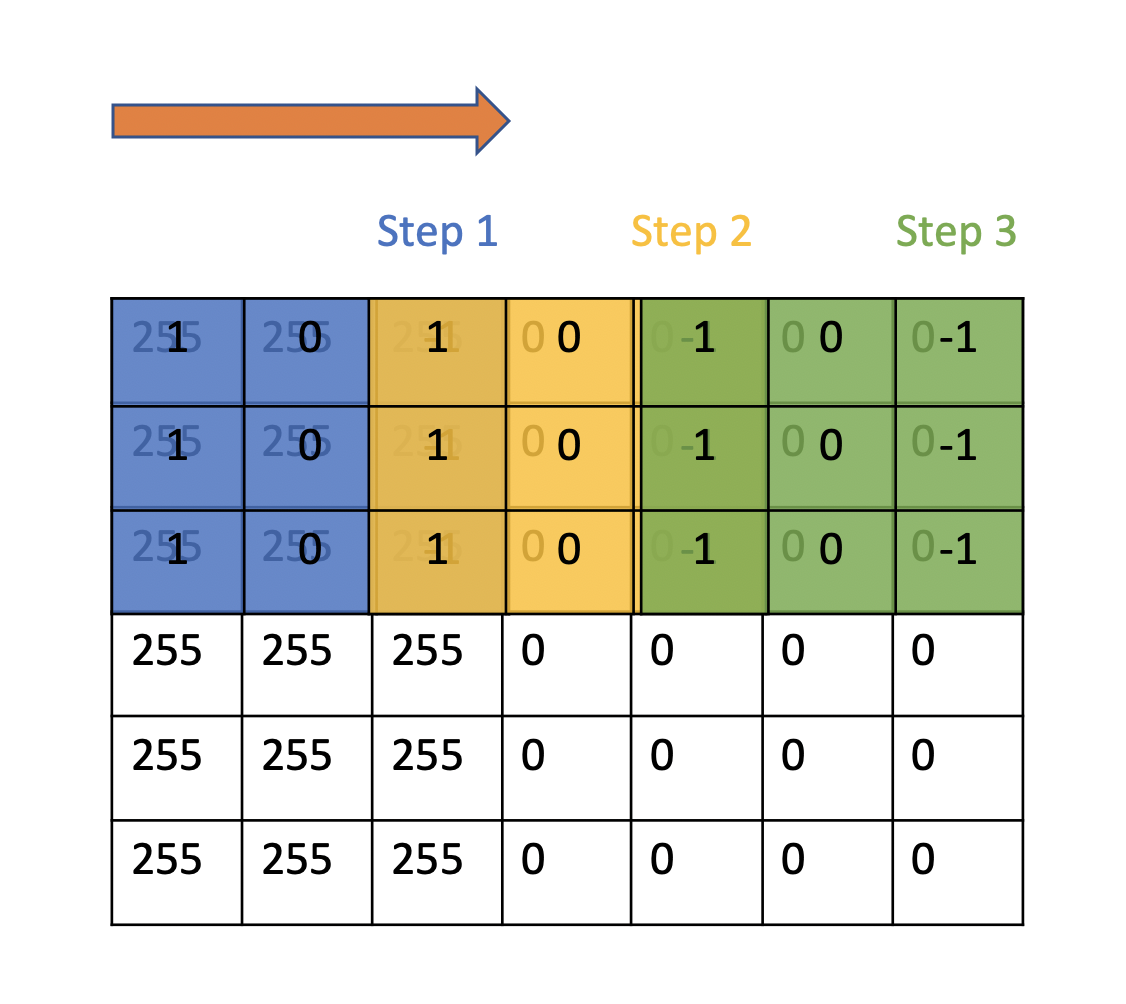

Since we are taking larger steps, we will reach the end of the image in fewer steps. As a consequence, the resulting feature map will be smaller since the feature map directly depends on the number of steps we take.
If we slide a few 3×3 filters over a 7×7 image, we can only take two steps until we reach the end of the image. Counting the initial position of the filter as another step, we can only take 3 steps resulting in a 3×3 output map.

## Pooling

Pooling is used to reduce the spatial dimension of the activations.
Consider this image below where the 4x4 is your activations 

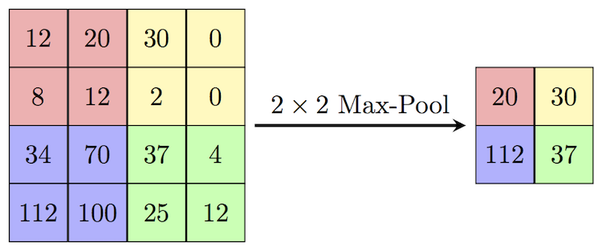

If you take the max of each of the four 2x2 windows (shown with different colors), you have done the Max Pooling operation (with a stride of 2). Most often Max is operation used, but you could use average or min based on your requirements.

As you can see, the activation has reduced from the size of 4x4 to 2x2 after the max-pool operation.

In the example above the 2x2 window is moved two steps at a time, if instead, you moved one step at a time (stride=1), then the output would be

20, 30, 30
70, 70, 37
112,100,37